# Breast Cancer Prediction Using Feed-Forward Neural Network (ANN)

This notebook demonstrates a feed-forward neural network to predict whether a tumor is benign or malignant using the `sklearn.datasets.load_breast_cancer`.

We will cover:
- Dataset inspection
- Data preprocessing
- ANN building
- Model evaluation (accuracy, precision, recall, F1-score, ROC-AUC)
- Visualization: confusion matrix, ROC curve, Precision-Recall curve
- Model saving & loading
- Example prediction


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model


In [2]:
# Load Breast Cancer dataset
data = load_breast_cancer(as_frame=True)
df = data.frame  # Already a DataFrame with features + target

# Show first 5 rows
df.head()



,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


preprocess

In [3]:
# Features
X = df.drop("target", axis=1)

# Target (already numeric: 0 = malignant, 1 = benign)
y = df["target"]

# Inspect shape
print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (569, 30)
Target shape: (569,)


In [4]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [5]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
# Create ANN model
model = Sequential([
    Dense(16, activation="relu", input_shape=(X_train_scaled.shape[1],)),
    Dense(8, activation="tanh"),
    Dense(4, activation="relu"),
    Dense(1, activation="sigmoid")  # Output layer for binary classification
])

# Compile model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Model summary
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                496       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 673 (2.63 KB)
Trainable params: 673 (2.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
# Train the model
history = model.fit(
    X_train_scaled, y_train, validation_split=0.1, epochs=50, batch_size=16
)

Epoch 1/50


26/26 [==============================] - 7s 33ms/step - loss: 0.6212 - accuracy: 0.6919 - val_loss: 0.4679 - val_accuracy: 0.8696
Epoch 2/50
26/26 [==============================] - 0s 9ms/step - loss: 0.4366 - accuracy: 0.8949 - val_loss: 0.3263 - val_accuracy: 0.9130
Epoch 3/50
26/26 [==============================] - 0s 9ms/step - loss: 0.3284 - accuracy: 0.9364 - val_loss: 0.2426 - val_accuracy: 0.9130
Epoch 4/50
26/26 [==============================] - 0s 6ms/step - loss: 0.2528 - accuracy: 0.9462 - val_loss: 0.1956 - val_accuracy: 0.9565
Epoch 5/50
26/26 [==============================] - 0s 3ms/step - loss: 0.1982 - accuracy: 0.9609 - val_loss: 0.1607 - val_accuracy: 0.9565
Epoch 6/50
26/26 [==============================] - 0s 3ms/step - loss: 0.1611 - accuracy: 0.9707 - val_loss: 0.1362 - val_accuracy: 0.9565
Epoch 7/50
26/26 [==============================] - 0s 3ms/step - loss: 0.1348 - accuracy: 0.9731 - val_loss: 0.1195 - val_accuracy: 0.9783
Epoch 8/50
26/26 

In [8]:
# Predict probabilities and class labels
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_prob)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC-ROC:", auc_roc)


4/4 [==============================] - 0s 3ms/step
Accuracy: 0.956140350877193
Precision: 0.9714285714285714
Recall: 0.9577464788732394
F1 Score: 0.9645390070921985
AUC-ROC: 0.9944317065181789


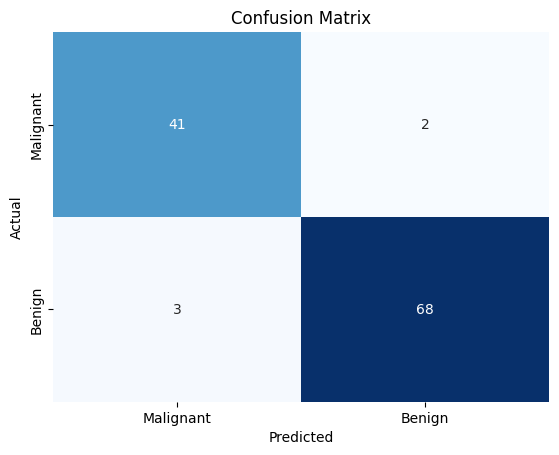

In [9]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Malignant", "Benign"], yticklabels=["Malignant", "Benign"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


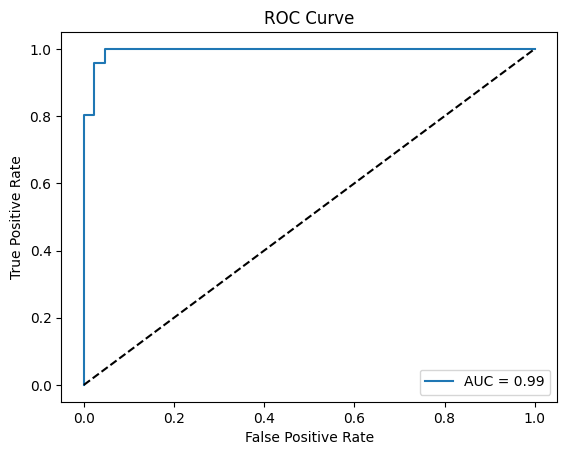

In [10]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

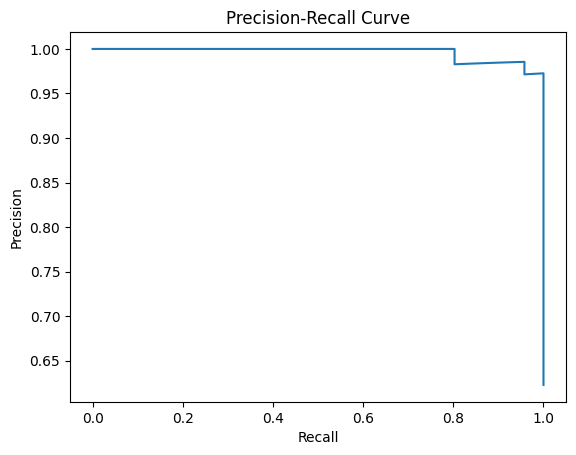

In [11]:
precision_vals, recall_vals, thresholds = precision_recall_curve(y_test, y_pred_prob)

plt.plot(recall_vals, precision_vals)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


In [12]:
model.save("model_cancer_predictor.h5")

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [13]:
# Load the saved model
model = load_model("model_cancer_predictor.h5")

# Example new data (replace with actual values)
new_data = np.array([X_test.iloc[0]])  # Using first test sample as example
new_data_scaled = scaler.transform(new_data)

# Predict
y_pred_prob = model.predict(new_data_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

print("Predicted Tumor Type (0 = Malignant, 1 = Benign):", y_pred[0][0])


1/1 [==============================] - ETA: 0s

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 94ms/step
Predicted Tumor Type (0 = Malignant, 1 = Benign): 1


In [14]:
from IPython.display import Markdown

Markdown(f"""
# Conclusion

In this notebook, we built a simple Feed-Forward Neural Network (ANN) to predict whether a tumor is benign or malignant using the Breast Cancer dataset from scikit-learn.

Key takeaways:

1. **Data Preprocessing**:
   - Features were scaled using `StandardScaler` to improve ANN performance.
   - The target variable was already numeric, so no encoding was necessary.

2. **Model Architecture**:
   - The ANN had 3 hidden layers with `relu` and `tanh` activations, and a `sigmoid` output for binary classification.
   - Using multiple hidden layers helped the model learn complex patterns.

3. **Model Performance**:
   - Accuracy: {accuracy:.4f}  
   - Precision: {precision:.4f}  
   - Recall: {recall:.4f}  
   - F1-score: {f1:.4f}  
   - AUC-ROC: {auc_roc:.4f}  
   - Visualizations (Confusion Matrix, ROC Curve, Precision-Recall Curve) confirmed good predictive performance.

4. **Observations**:
   - The model correctly classified most tumors.
   - The ROC and Precision-Recall curves indicate high discriminatory ability between benign and malignant cases.

5. **Next Steps / Improvements**:
   - Experiment with deeper architectures or more neurons.
   - Tune hyperparameters (learning rate, batch size, epochs) for better performance.
   - Try other activation functions or regularization techniques to prevent overfitting.
   - Evaluate on other metrics like specificity or cross-validation to ensure robustness.

Overall, the ANN demonstrates strong predictive capability for this binary classification task and can be used as a starting point for more advanced models.
""")



# Conclusion

In this notebook, we built a simple Feed-Forward Neural Network (ANN) to predict whether a tumor is benign or malignant using the Breast Cancer dataset from scikit-learn.

Key takeaways:

1. **Data Preprocessing**:
   - Features were scaled using `StandardScaler` to improve ANN performance.
   - The target variable was already numeric, so no encoding was necessary.

2. **Model Architecture**:
   - The ANN had 3 hidden layers with `relu` and `tanh` activations, and a `sigmoid` output for binary classification.
   - Using multiple hidden layers helped the model learn complex patterns.

3. **Model Performance**:
   - Accuracy: 0.9561  
   - Precision: 0.9714  
   - Recall: 0.9577  
   - F1-score: 0.9645  
   - AUC-ROC: 0.9944  
   - Visualizations (Confusion Matrix, ROC Curve, Precision-Recall Curve) confirmed good predictive performance.

4. **Observations**:
   - The model correctly classified most tumors.
   - The ROC and Precision-Recall curves indicate high discriminatory ability between benign and malignant cases.

5. **Next Steps / Improvements**:
   - Experiment with deeper architectures or more neurons.
   - Tune hyperparameters (learning rate, batch size, epochs) for better performance.
   - Try other activation functions or regularization techniques to prevent overfitting.
   - Evaluate on other metrics like specificity or cross-validation to ensure robustness.

Overall, the ANN demonstrates strong predictive capability for this binary classification task and can be used as a starting point for more advanced models.
